In [43]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

In [49]:
# Load prediction data
with h5py.File("data/data.hdf5", "r") as f:
    artist = [i.decode("utf-8") for i in f["artist"][:]]
with h5py.File("data/predictions.hdf5", "r") as f:
    predictions = f["predictions"][:]
predictions = predictions[:30000]
artists = artist[:30000]

In [53]:
# Prediction sanity check
Y_1 = [i[0] for i in predictions]
data = pd.DataFrame(data=[artists,Y_1]).T
data.columns = ["artist","latent"]
data.sort_values("latent",ascending=True)

,artist,latent
576,Generation X,-0.01581
1084,Willy Porter,-0.0141569
13920,Juana La Loca,-0.0139191
5259,Holly Valance,-0.0137483
1571,Lexter,-0.0136613
11820,Jimmy Eat World,-0.013527
4393,Asem Shama,-0.0133732
25503,Keene_ Tommy,-0.0133721
29134,Rene Ablaze pres. Fallen Skies,-0.0133317
5359,Javine,-0.0131772


In [8]:
# TSNE
tisney = TSNE(n_components=2, random_state=0)
vectors2d = tisney.fit_transform(predictions)

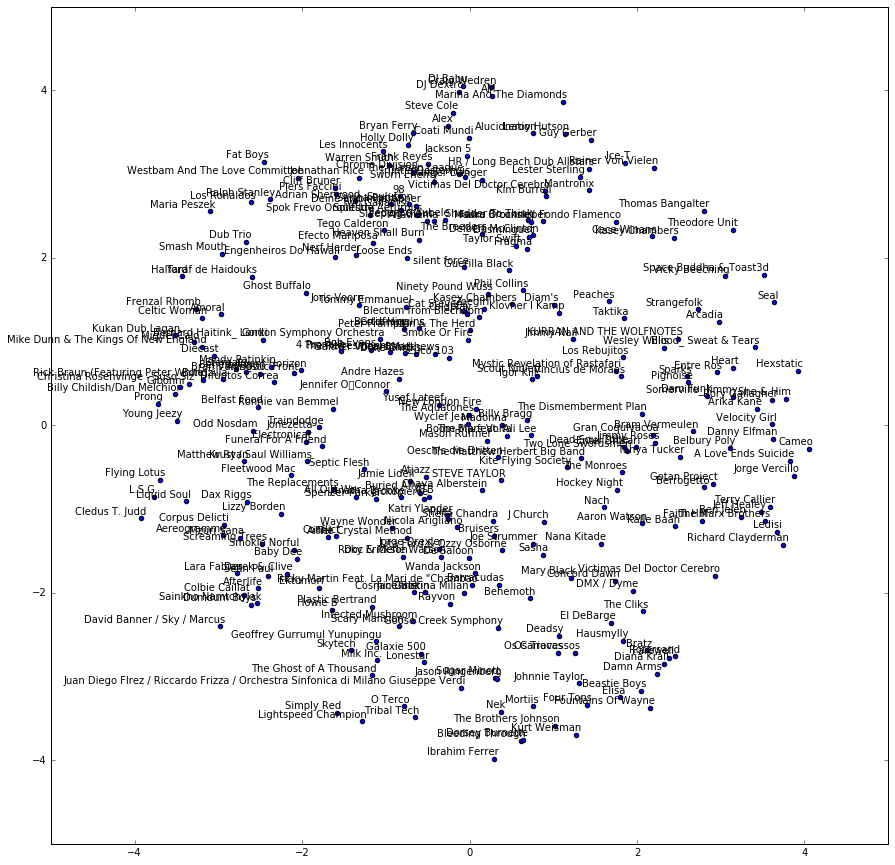

In [37]:
# Plot
plt.figure(figsize=(15, 15))
for i, artist in enumerate(artists[2000:]):
    if i > 300:
        break
    x, y = vectors2d[i+2000,:]
    plt.scatter(x, y)
    plt.annotate(artist, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()